# Test Notebook for testing the features before adding them in actual script

In [2]:
import requests
from bs4 import BeautifulSoup

In [65]:
url = 'https://www.justdial.com/Lucknow/Tunday-Kababi-Beside-StMarry-Inter-College-Neer-Around-Town-Aminabad/0522PX522-X522-101028105411-T9G7_BZDET/menu?trkid=277-remotecity-fcat&term=Restaurants&ncatid=10408936&area=&search=Best%20Restaurants%20in%20Lucknow%20-%20Order%20Food%20Online&mncatname=Restaurants&abd_btn=&abd_heading=&bd=1&cat_b2b_flag=0&searchfrom=lst'

In [66]:
def get_headers():
    return {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Connection': 'keep-alive',
    }

# Make request with proper headers
response = requests.get(url, headers=get_headers())
response.raise_for_status()

# Parse HTML
soup = BeautifulSoup(response.text, 'lxml')

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8" class="jsx-a416725ce0f4cd1d"/>
  <link class="jsx-a416725ce0f4cd1d" href="//akam.cdn.jdmagicbox.com" rel="dns-prefetch"/>
  <link class="jsx-a416725ce0f4cd1d" href="//content.jdmagicbox.com" rel="dns-prefetch"/>
  <link class="jsx-a416725ce0f4cd1d" href="//content.jdmagicbox.com" rel="preconnect"/>
  <link class="jsx-a416725ce0f4cd1d" href="https://fonts.googleapis.com" rel="preconnect"/>
  <link class="jsx-a416725ce0f4cd1d" href="https://fonts.gstatic.com" rel="preconnect"/>
  <meta class="jsx-a416725ce0f4cd1d" content="#fff" name="theme-color"/>
  <title class="jsx-7cb2da2eea9f07ea">
   Tunday Kababi Menu in Aminabad, Lucknow Updated 2025 - Food Menu - Justdial
  </title>
  <meta class="jsx-7cb2da2eea9f07ea" content="Tunday Kababi Menu in Aminabad, Lucknow Updated 2025 - Food Menu - Justdial" name="Title"/>
  <meta class="jsx-7cb2da2eea9f07ea" content="Food Menu of Tunday Kababi. Get Latest Restaurant Menu Online for Tu
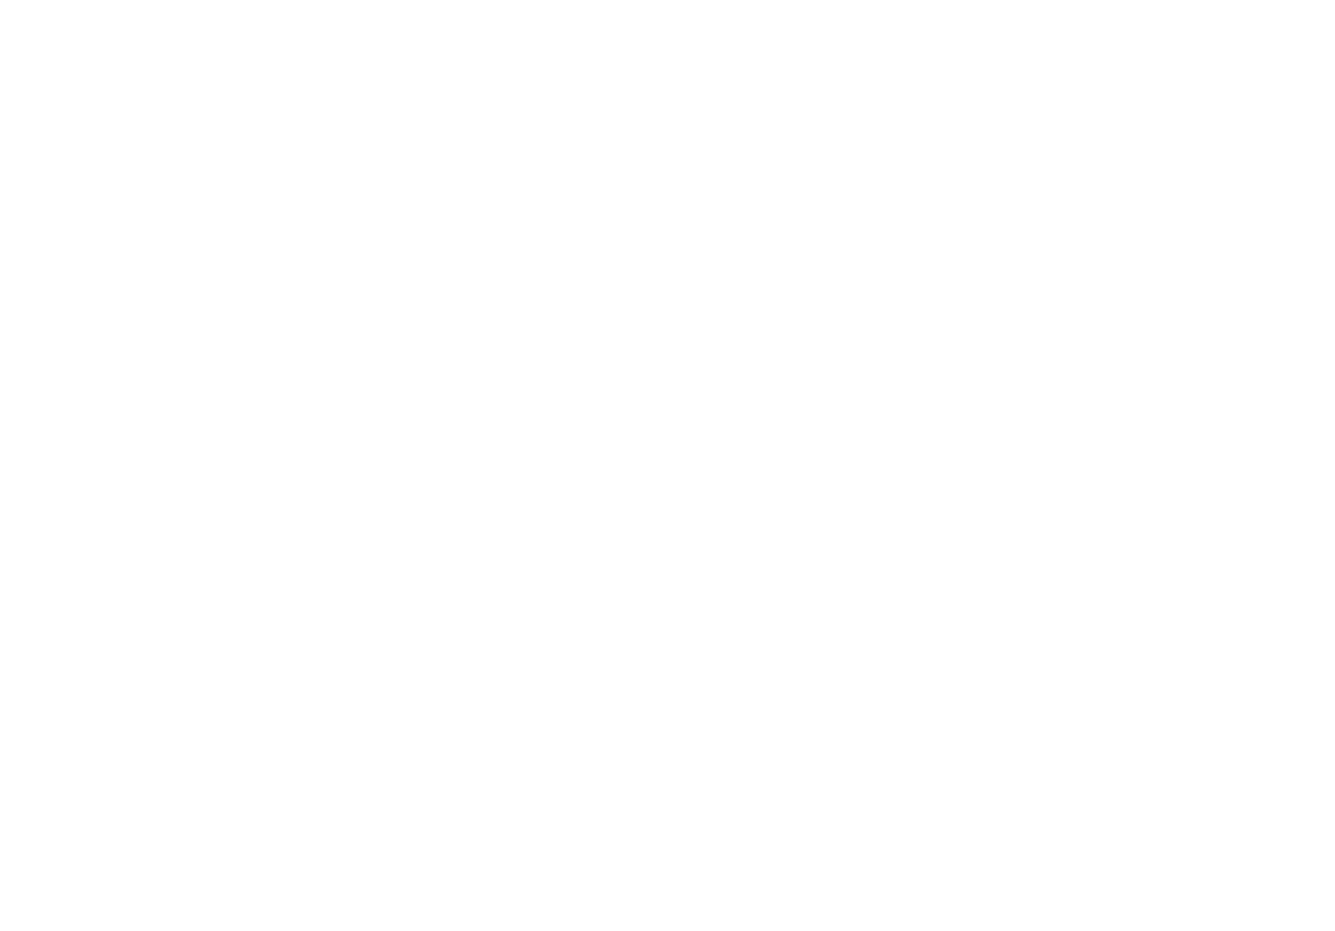

In [67]:
print(soup.prettify())

In [68]:
name = soup.find('div', class_='compney').text
name

'Tunday Kababi'

In [69]:
rating = soup.find('div' , class_='vendbox_rateavg').text
rating

'4.5 '

In [106]:
rate_count = soup.find('div', class_='vendbox_ratecount').text.split(' ')[0]
rate_count

'55,298'

In [71]:
address = soup.find('div', class_='adress').find_next('a').text
address

'Aminabad, LucknowNaaz Cinema Road, Aminabad, Lucknow - 226018 (Beside St.Marry Inter College, Neer Around Town)'

In [72]:
special_info = soup.find_all('div', 'adress font14 fw100 color111')[1].text
special_info

'Parking Available'

In [76]:
operating_hours = soup.find_all('div', class_='operation')[1].text
print(operating_hours)

Open  until 11:30 pm


In [91]:
sidemenulist = soup.find('ul', class_='sidemenulist').text
sidemenulist = sidemenulist.split(' (')[:-1]
for i in range(len(sidemenulist)):
    if i == 0:
        continue
    sidemenulist[i] = sidemenulist[i].split(')')[1]
sidemenulist

['Kebabs',
 'Starters',
 'Main Course',
 'Biryanis',
 'Desserts',
 'Keema',
 'Accompanients',
 'Kabab Paratha Combo']

In [98]:
menu = soup.find_all('div', class_='accordion_collapse')
print(menu)

[<div aria-labelledby="Kebabs" class="accordion_collapse" data-bs-parent="#accordionExample"><div class="accordion_body pb-20"><div class="service_row" id="352363238"><div class="service_preview"><div class="service_txtbox"><div class="service_tagbox"><div aria-label="Non Veg" role="presentation"><img alt="Non Veg" class="mb-4" height="18px" src="https://akam.cdn.jdmagicbox.com/images/icontent/newwap/newprot_w/restaurants_menu_nonveg-icon.png" width="12px"/></div></div><div class="service_name font18 fw500 color111 line_clamp_2">Tunday Mutton Kebab (galouti)</div><div class="service_pricing mt-8"><div class="service_priceoffer font18 fw600 color111 mr-6"><span class="rupees font16 fw500 mr-2">₹</span> 28</div></div><div class="service_description mt-8"><div class="font14 fw500 color007" role="button" tabindex="0">View More</div></div></div></div></div><div class="service_row service_cursor_default" id="352363235"><div class="service_preview"><div class="service_txtbox"><div class="serv

In [ ]:
def extract_menu(soup):
    menu_dict = {}
    menu_sections = soup.find_all('div', class_='accordion_collapse')
    
    for section in menu_sections:
        category = section.get('aria-labelledby', 'Unknown')
        items = []
        menu_items = section.find_all('div', class_='service_preview')
        
        for item in menu_items:
            try:
                item_data = {
                    "name": None,
                    "price": None,
                    "veg_status": None
                }
                name_elem = item.find('div', class_='service_name')
                if name_elem:
                    link = name_elem.find('a')
                    if link:
                        item_data["name"] = link.text.strip()
                    else:
                        item_data["name"] = name_elem.text.strip()
                
                price_elem = item.find('div', class_='service_priceoffer')
                if price_elem:
                    price_text = price_elem.text.strip()
                    item_data["price"] = int(price_text.split('₹')[1].strip())
                
                veg_img = item.find('img', alt='Veg')
                nonveg_img = item.find('img', alt='Non Veg')
                if veg_img:
                    item_data["veg_status"] = "veg"
                elif nonveg_img:
                    item_data["veg_status"] = "non-veg"
                
                if item_data["name"]:
                    items.append(item_data)
                    
            except Exception as e:
                print(f"Error processing item: {str(e)}")
                continue
        
        menu_dict[category] = items
    return menu_dict

menu_data = extract_menu(soup)
print(json.dumps(menu_data, indent=2))

{
  "Kebabs": [
    {
      "name": "Tunday Mutton Kebab (galouti)",
      "price": 28,
      "veg_status": "non-veg"
    },
    {
      "name": "Chicken Tangdi Kebab (2 Pcs)",
      "price": 199,
      "veg_status": "non-veg"
    },
    {
      "name": "Veg Kebab (4 Pcs)",
      "price": 106,
      "veg_status": "veg"
    },
    {
      "name": "Tunday Galouti Kebab (black Buffalo)",
      "price": 15,
      "veg_status": "non-veg"
    },
    {
      "name": "Chicken Seekh Kebab (8 Pcs)",
      "price": 119,
      "veg_status": "non-veg"
    }
  ],
  "Starters": [
    {
      "name": "Fish Tikka (8 Pcs)",
      "price": 384,
      "veg_status": "non-veg"
    },
    {
      "name": "Chicken Tikka (8 Pcs)",
      "price": 331,
      "veg_status": "non-veg"
    },
    {
      "name": "Roasted Chicken",
      "price": 199,
      "veg_status": "non-veg"
    },
    {
      "name": "Chicken Malai Tikka (8 Pcs)",
      "price": 331,
      "veg_status": "non-veg"
    }
  ],
  "MainCourse": [
 

In [104]:
contact_no  = '07947114254'
contact_no

'07947114254'

In [115]:
# generating final json
import json
from datetime import datetime

def create_restaurant_json(soup, url):
    """Create a complete restaurant data JSON with all scraped information"""
    restaurant_data = {
        "scrape_metadata": {
            "scrape_url": url,
            "scrape_timestamp": datetime.now().isoformat()
        },
        "basic_info": {
            "name": None,
            "rating": None,
            "rating_count": None,
            "address": None,
            "contact": None,
            "operating_hours": None,
            "special_info": None
        },
        "menu": {}
    }
    
    try:
        # Basic Info
        name_elem = soup.find('div', class_='compney')
        if name_elem:
            restaurant_data["basic_info"]["name"] = name_elem.text.strip()
            
        rating_elem = soup.find('div', class_='vendbox_rateavg')
        if rating_elem:
            restaurant_data["basic_info"]["rating"] = float(rating_elem.text.strip())
            
        rate_count_elem = soup.find('div', class_='vendbox_ratecount')
        if rate_count_elem:
            restaurant_data["basic_info"]["rating_count"] = rate_count_elem.text.split(' ')[0]
            
        address_elem = soup.find('div', class_='adress').find_next('a')
        if address_elem:
            restaurant_data["basic_info"]["address"] = address_elem.text.strip()
        
        # Contact
        restaurant_data["basic_info"]["contact"] = "07947114254"  # As given in the notebook
        
        # Operating Hours
        hours_elem = soup.find_all('div', class_='operation')
        if len(hours_elem) > 1:
            restaurant_data["basic_info"]["operating_hours"] = hours_elem[1].text.strip()
            
        # Special Info
        special_info_elem = soup.find_all('div', 'adress font14 fw100 color111')
        if len(special_info_elem) > 1:
            restaurant_data["basic_info"]["special_info"] = special_info_elem[1].text.strip()
        
        # Menu (using existing extract_menu function)
        menu_data = extract_menu(soup)
        if menu_data:
            restaurant_data["menu"] = menu_data
            
        # Save to JSON file
        filename = f"scraped_data/{name_elem.text.strip()}.json"
        with open(filename, 'w+', encoding='utf-8') as f:
            json.dump(restaurant_data, f, indent=2, ensure_ascii=False)
            
        return restaurant_data
        
    except Exception as e:
        print(f"Error creating restaurant JSON: {str(e)}")
        return None

# Test the function
restaurant_data = create_restaurant_json(soup, url)
if restaurant_data:
    print("Successfully created restaurant JSON!")
    print(json.dumps(restaurant_data, indent=2))

Successfully created restaurant JSON!
{
  "scrape_metadata": {
    "scrape_url": "https://www.justdial.com/Lucknow/Tunday-Kababi-Beside-StMarry-Inter-College-Neer-Around-Town-Aminabad/0522PX522-X522-101028105411-T9G7_BZDET/menu?trkid=277-remotecity-fcat&term=Restaurants&ncatid=10408936&area=&search=Best%20Restaurants%20in%20Lucknow%20-%20Order%20Food%20Online&mncatname=Restaurants&abd_btn=&abd_heading=&bd=1&cat_b2b_flag=0&searchfrom=lst",
    "scrape_timestamp": "2025-04-26T17:55:34.616015"
  },
  "basic_info": {
    "name": "Tunday Kababi",
    "rating": 4.5,
    "rating_count": "55,298",
    "address": "Aminabad, LucknowNaaz Cinema Road, Aminabad, Lucknow - 226018 (Beside St.Marry Inter College, Neer Around Town)",
    "contact": "07947114254",
    "operating_hours": "Open  until 11:30 pm",
    "special_info": "Parking Available"
  },
  "menu": {
    "Kebabs": [
      {
        "name": "Tunday Mutton Kebab (galouti)",
        "price": 28,
        "veg_status": "non-veg"
      },
    